In [1]:
import pandas as pd
train=pd.read_csv("C:\Windows\Lenovo\\train.csv")
gender=pd.read_csv("C:\Windows\Lenovo\\gender_submission.csv")
test=pd.read_csv("C:\Windows\Lenovo\\test.csv")

In [2]:
import matplotlib.pyplot

In [3]:
def bar_chart(feature):
    Survived=train[train["Survived"]==1][feature].value_counts()
    dead=train[train["Survived"]==0][feature].value_counts()
    df=pd.DataFrame([Survived,dead])
    df.index=["Survived","dead"]
    df.plot(kind="bar",stacked=True,figsize=(10,5))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [8]:
#train_1=train.pop('Survived')
#train_1.head()

In [9]:
train_test_data=[train,test]
for dataset in train_test_data:
    dataset["Title"]=dataset["Name"].str.extract('([A-Za-z]+)\.',expand=False)

In [10]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Capt          1
Jonkheer      1
Lady          1
Mme           1
Countess      1
Ms            1
Don           1
Name: Title, dtype: int64

In [11]:
title_mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,
               "Mlle":3,"Countess":3,"Dona":3,"Mme":3,"Capt":3,"Sir":3,"Don":3,
               "Jonkheer":3,"Lady":3,"Ms":3}
for dataset in train_test_data:
    dataset["Title"]=dataset["Title"].map(title_mapping)

In [12]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [14]:
train.drop("Name",axis=1,inplace=True)
test.drop("Name",axis=1,inplace=True)

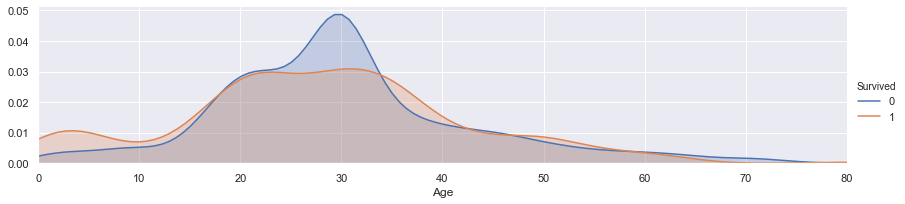

In [15]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()
plt.show()

(20, 30)

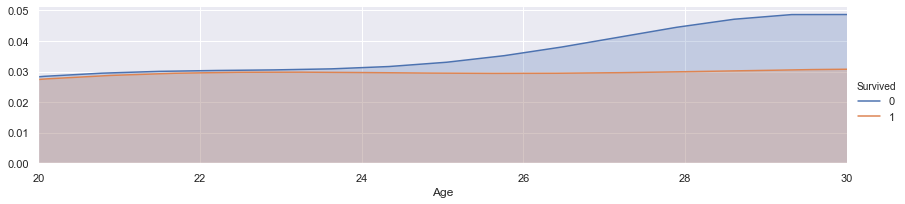

In [16]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()
plt.xlim(20,30)

(0, 20)

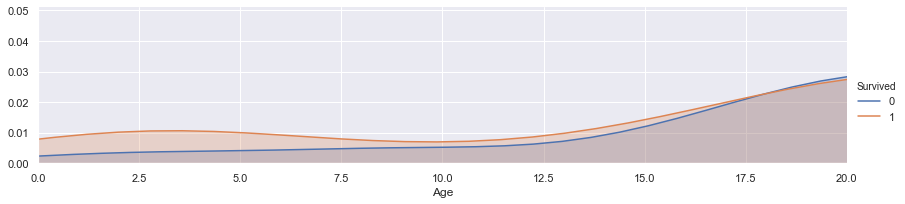

In [17]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()
plt.xlim(0,20)

(40, 60)

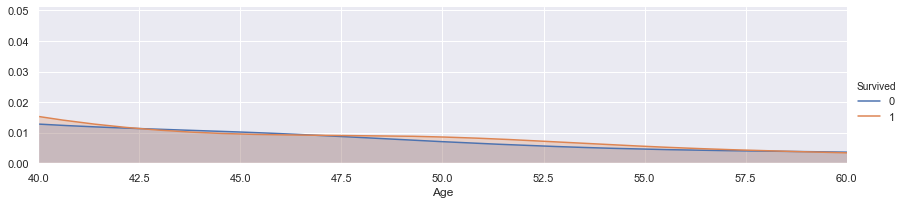

In [18]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()
plt.xlim(40,60)

(60, 80)

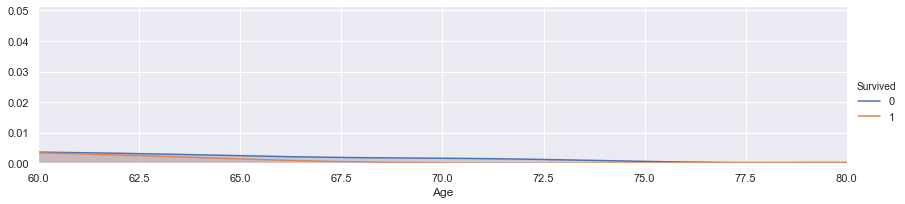

In [19]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()
plt.xlim(60,80)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [21]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"] <=16, "Age"]=0,
    dataset.loc[(dataset["Age"] >16)&(dataset["Age"] <=26), "Age"]=1,
    dataset.loc[(dataset["Age"] >26)&(dataset["Age"] <=36), "Age"]=2,
    dataset.loc[(dataset["Age"] >36)&(dataset["Age"] <=62), "Age"]=3,
    dataset.loc[dataset["Age"] >62, "Age"]=4

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,0


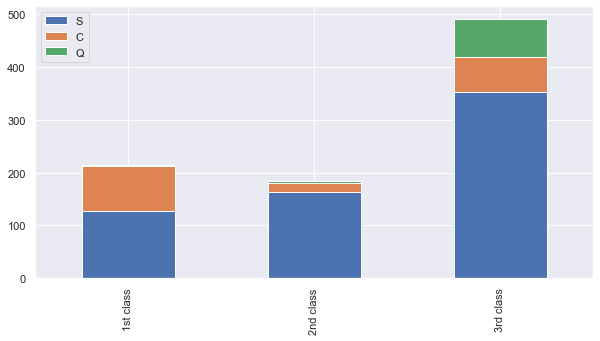

In [23]:
Pclass1=train[train["Pclass"]==1]["Embarked"].value_counts()
Pclass2=train[train["Pclass"]==2]["Embarked"].value_counts()
Pclass3=train[train["Pclass"]==3]["Embarked"].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=["1st class","2nd class","3rd class"]
df.plot(kind="bar",stacked=True,figsize=(10,5))

In [24]:
for dataset in train_test_data:
    dataset["Embarked"]=dataset["Embarked"].fillna("S")

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,0


In [26]:
embarked_mapping = {"S":0,"C":1,"Q":2}
for dataset in train_test_data:
    dataset["Embarked"]=dataset["Embarked"].map(embarked_mapping)

In [27]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,female,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,male,3.0,0,0,240276,9.6875,NaN,2,0
3,895,3,male,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,0,2


In [28]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace=True)
test["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace=True)

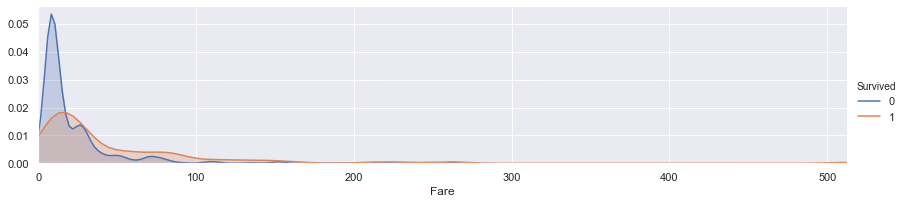

In [29]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,train["Fare"].max()))
facet.add_legend()
plt.show()

In [30]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"] <=17, "Fare"]=0,
    dataset.loc[(dataset["Fare"] >17)&(dataset["Fare"] <=30), "Fare"]=1,
    dataset.loc[(dataset["Fare"] >30)&(dataset["Fare"] <=100), "Fare"]=2,
    dataset.loc[dataset["Fare"] >100, "Fare"]=3

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,female,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,female,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,male,2.0,0,0,373450,0.0,NaN,0,0


In [32]:
for dataset in train_test_data:
    dataset["Cabin"]=dataset["Cabin"].str[:1]

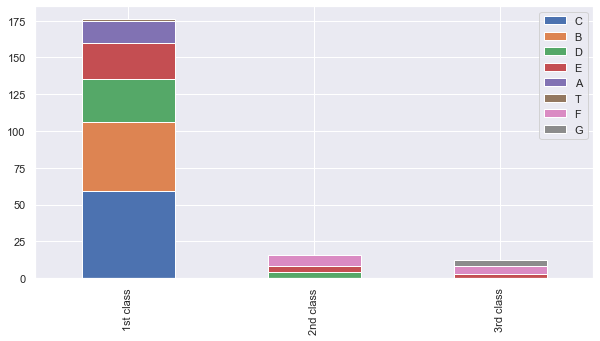

In [33]:
Pclass1=train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2=train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3=train[train["Pclass"]==3]["Cabin"].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=["1st class","2nd class","3rd class"]
df.plot(kind="bar",stacked=True,figsize=(10,5))

In [34]:
cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8}
for dataset in train_test_data:
    dataset["Cabin"]=dataset["Cabin"].map(cabin_mapping)

In [35]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)
test["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

In [36]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,2.0,0,0,330911,0.0,2.0,2,0
1,893,3,female,3.0,1,0,363272,0.0,0.8,0,2
2,894,2,male,3.0,0,0,240276,0.0,2.0,2,0
3,895,3,male,2.0,0,0,315154,0.0,0.8,0,0
4,896,3,female,1.0,1,1,3101298,0.0,2.0,0,2


In [37]:
train['FamilySize']=train["SibSp"]+train["Parch"]+1
test['FamilySize']=test["SibSp"]+test["Parch"]+1

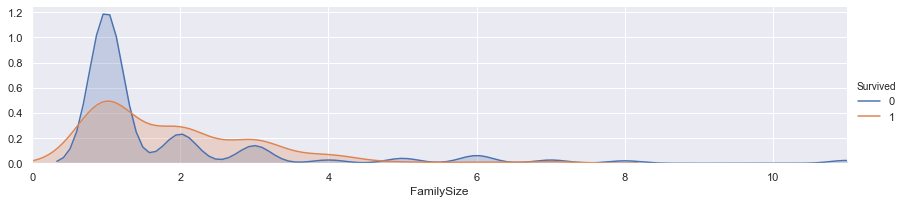

In [38]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"FamilySize",shade=True)
facet.set(xlim=(0,train["FamilySize"].max()))
facet.add_legend()
plt.show()

In [39]:
Family_mapping = {1: 0,2 :0.4,3: 0.8,
                  4: 1.2,5: 1.6,6: 2,7: 2.4,
                  8: 2.8,9: 3.2,10: 3.6,11: 4.0}
for dataset in train_test_data:
    dataset["FamilySize"]=dataset["FamilySize"].map(Family_mapping)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,female,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,female,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,male,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [41]:
sex_mapping={"male":0,"female":1}
for dataset in train_test_data:
    dataset["Sex"]=dataset["Sex"].map(sex_mapping)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [43]:
features_drop=["Ticket","SibSp","Parch"]
train=train.drop(features_drop,axis=1)
test=test.drop(features_drop,axis=1)
train=train.drop(["PassengerId"],axis=1)

In [44]:
train_data=train.drop("Survived",axis=1)
target=train["Survived"]
train_data.shape,target.shape

((891, 8), (891,))

In [45]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_Fold=KFold(n_splits=10,shuffle=True,random_state=0)

In [47]:
clf=KNeighborsClassifier(n_neighbors=13)
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_Fold,n_jobs=1,scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [48]:
round(np.mean(score)*100,2)

82.6

In [49]:
clf=DecisionTreeClassifier()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_Fold,n_jobs=1,scoring=scoring)
print(score)

[0.76666667 0.80898876 0.7752809  0.7752809  0.87640449 0.76404494
 0.83146067 0.82022472 0.74157303 0.78651685]


In [50]:
round(np.mean(score)*100,2)

79.46

In [51]:
clf=RandomForestClassifier(n_estimators=13)
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_Fold,n_jobs=1,scoring=scoring)
print(score)

[0.78888889 0.82022472 0.79775281 0.78651685 0.85393258 0.80898876
 0.82022472 0.78651685 0.75280899 0.85393258]


In [52]:
round(np.mean(score)*100,2)

80.7

In [53]:
clf= GaussianNB()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_Fold,n_jobs=1,scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [54]:
round(np.mean(score)*100,2)

78.78

In [55]:
clf= SVC()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_Fold,n_jobs=1,scoring=scoring)
print(score)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

In [56]:
round(np.mean(score)*100,2)

83.5

In [57]:
clf=SVC()
clf.fit(train_data,target)
test_data=test.drop("PassengerId",axis=1).copy()
prediction=clf.predict(test_data)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [65]:
submission =pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":prediction}).to_csv('kaggle0.csv',index=False)

In [67]:
submission_1=pd.read_csv("kaggle0.csv")

In [68]:
submission_1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
